2019 5 20
# Enriching Pre-trained Language Model with Entity Information for Relation Classification
# 用实体信息丰富训练前的语言模型进行关系分类 

## Abstract
Relation classification is an important NLP task to extract relations between entities. The state-of-the-art methods for relation classification are primarily based on Convolutional or Recurrent Neural Networks. Recently, the pre-trained BERT model achieves very successful results in many NLP classification / sequence labeling tasks. Relation classification differs from those tasks in that it relies on information of both the sentence and the two target entities. In this paper, we propose a model that both leverages the pretrained BERT language model and incorporates information from the target entities to tackle the relation classification task. We locate the target entities and transfer the information through the pre-trained architecture and incorporate the corresponding encoding of the two entities. We achieve significant improvement over the state-of-the-art method on the SemEval-2010 task 8 relational dataset.

## 摘要
关系分类是提取实体间关系的一项重要的自然语言处理任务。目前最先进的关系分类方法主要是基于卷积或递归神经网络。最近，在许多NLP分类/序列标记任务中，预先训练的BERT模型取得了非常成功的结果。关系分类不同于这些任务，它依赖于句子和两个目标实体的信息。在本文中，我们提出了一个利用预先训练的BERT语言模型并结合目标实体的信息来处理关系分类任务的模型。我们定位目标实体并通过预先训练的体系结构传输信息，并将两个实体的相应编码合并在一起。我们对SemEval-2010 task 8关系数据集的最新方法进行了显著改进。

## 1 Introduction
The task of relation classification is to predict semantic relations between pairs of nominals. Given a sequence of text (usually a sentence) s and a pair of nominals e1 and e2, the objective is to identify the relation between e1 and e2 (Hendrickx et al., 2010). It is an important NLP task which is normally used as an intermediate step in variety of NLP applications. The following example shows the Component-Whole relation between the nominals “kitchen” and “house”: “The [kitchen]e1 is the last renovated part of the [house]e1.”

Recently, deep neural networks have applied to relation classification . These methods usually use some features derived from lexical resources such as Word-Net or NLP tools such as dependency parsers and named entity recognizers (NER).

Language model pre-training has been shown to be effective for improving many natural language processing tasks. The pretrained model BERT proposed by has especially significant impact. It has been applied to multiple NLP tasks and obtains new state-of-theart results on eleven tasks. The tasks that BERT has been applied to are typically modeled as classification problems and sequence labeling problems. It has also been applied to the SQuAD question answering problem, in which the objective is to find the starting point and ending point of an answer span.

As far as we know, the pretrained BERT model has not been applied to relation classification, which relies not only on the information of the whole sentence but also on the information of the specific target entities. In this paper, we apply the pretrained BERT model for relation classification. We insert special tokens before and after the target entities before feeding the text to BERT for fine-tuning, in order to identify the locations of the two target entities and transfer the information into the BERT model. We then locate the positions of the two target entities in the output embedding from BERT model. We use their embeddings as well as the sentence encoding (embedding of the special first token in the setting of BERT) as the input to a multi-layer neural network for classification. By this way, it captures both the semantics of the sentence and the two target entities to better fit the relation classification task.

Our contributions are as follows: (1) We put forward an innovative approach to incorporate arXiv:1905.08284v1 [cs.CL] 20 May 2019 entity-level information into the pretrained language model for relation classification. (2) We achieve the new state-of-the-art for the relation classification task.


## 1 介绍
关系分类的任务是预测名词对之间的语义关系。给定一个文本序列(通常是一个句子)和一对名词性e1和e2，目标是识别e1和e2之间的关系。它是一项重要的NLP任务，通常作为各种NLP应用的中间步骤。下面的例子展示了命名词“kitchen”和“house”之间的组件-整体关系:“[kitchen]e1是[house]e1的最后一个翻新部分。”

近年来，深度神经网络被应用于关系分类。这些方法通常使用词法资源(如Word-Net)或NLP工具(如依赖项解析器和命名实体识别器)派生的一些特性。

语言模型预训练已被证明对提高许多自然语言处理任务是有效的。提出的预训练模型BERT的影响尤为显著。它已被应用于多个NLP任务，并在11个任务上获得了最新的状态结果。BERT所应用的任务通常被建模为分类问题和序列标记问题。该方法同样适用于以寻找答案跨度的起点和终点为目标的小队问题求解。

据我们所知，预先训练的BERT模型并没有应用到关系分类中，它不仅依赖于整个句子的信息，还依赖于特定目标实体的信息。在本文中，我们将预训练好的BERT模型应用于关系分类。在将文本交给BERT进行微调之前，我们在目标实体之前和之后插入特殊的标记，以便识别两个目标实体的位置，并将信息传递到BERT模型中。然后根据BERT模型定位两个目标实体在输出嵌入中的位置。我们使用它们的嵌入以及句子编码(在BERT的设置中嵌入特殊的第一个标记)作为多层神经网络的输入进行分类。通过这种方式，它可以捕获句子的语义和两个目标实体，从而更好地适应关系分类任务。

我们的贡献如下:(1)我们提出了合并arXiv:1905.08284v1的创新方法[cs]。2019年5月20日实体级信息进入预训练的关系分类语言模型。(2)实现了关系分类任务的最新发展。



## 2 Related Work

There has been some work with deep learning methods for relation classification, such as(Socher et al., 2012; Zeng et al., 2014; Yu et al.,2014; dos Santos et al., 2015)

MVRNN model applies a recursive neural network (RNN) to relation classification. They assign a matrix-vector representation to every node in a parse tree and compute the representation for the complete sentence from bottom up according to the syntactic structure of the parse tree. (Zeng et al., 2014) propose a CNN model by incorporating both word embeddings and position features as input. Then they concatenate lexical features and the output from CNN into a single vector and feed them into a softmax layer for prediction. (Yu et al., 2014) propose a Factor-based Compositional Embedding Model (FCM) by constructing sentence level and substructure embeddings from word embeddings, through dependency trees and named entities. (Santos et al., 2015) tackle the relation classification task by ranking with a convolutional neural network named CR-CNN. Their loss function is based on pairwise ranking. In our work, we take advantage of a pre-trained language model for the relation classification task, without relying on CNN or RNN architecutures. (Shen and Huang, 2016) utilize a CNN encoder in conjunction with a sentence representation that weights the words by attention between the target entities and the words in the sentence to perform relation classification. (Wang et al., 2016) propose a convolutional neural network architecture with two levels of attention in order to catch the patterns in heterogeneous contexts to classify relations. (Lee et al., 2019) develop an end-to-end recurrent neural model which incorporates an entity-aware attention mechanism with a latent entity typing for relation classification.

There are some related work on the relation extraction based on distant supervision, for example,(Mintz et al., 2009; Hoffmann et al., 2011; Lin et al., 2016; Ji et al., 2017; Wu et al., 2019). The difference between relation classification on regular data and on distantly supervised data is that the latter may contain a large number of noisy labels. In this paper, we focus on the regular relation classification problem, without noisy labels.


## 2 相关工作
已经有一些关于关系分类的深度学习方法的工作，如(Socher et al.， 2012;曾等，2014;Yu et al ., 2014;dos Santos等人，2015)

MVRNN模型采用递归神经网络(RNN)进行关系分类。他们为解析树中的每个节点分配一个矩阵向量表示，并根据解析树的语法结构自底向上计算完整句子的表示。(Zeng et al.， 2014)提出了一个CNN模型，将词的嵌入和位置特征作为输入。然后将词法特征和CNN的输出连接成单个向量，并将其输入softmax层进行预测。(Yu et al.， 2014)提出了一种基于因子的成分嵌入模型(FCM)，通过依赖树和命名实体，从词的嵌入构造句子级和子结构嵌入。(Santos et al.， 2015)通过一个名为CR-CNN的卷积神经网络进行排序来处理关系分类任务。它们的损失函数是基于两两排序的。在我们的工作中，我们利用一个预先训练好的语言模型来完成关系分类任务，而不依赖于CNN或RNN架构。(Shen and Huang, 2016)利用一个CNN编码器，结合一个句子表示法，在目标实体和句子中的单词之间通过注意加权单词，进行关系分类。(Wang et al.， 2016)提出了一种两层注意的卷积神经网络结构，以捕获异构上下文中的模式对关系进行分类。(Lee et al.， 2019)开发了一种端到端递归神经模型，该模型将实体感知注意机制与潜在实体类型结合起来进行关系分类。

有一些基于远程监控的关系提取的相关工作，例如，(Mintz et al.， 2009;Hoffmann等人，2011;Lin et al.， 2016;季等，2017;吴等人，2019年)。常规数据的关系分类和远距离监督数据的关系分类的区别在于后者可能包含大量的噪声标签。在本文中，我们关注的是规则关系分类问题，没有噪声标签。







## 3 Methodology
### 3.1 Pre-trained Model BERT
The pre-trained BERT model (Devlin et al., 2018) is a multi-layer bidirectional Transformer encoder. 

The design of input representation of BERT is to be able to represent both a single text sentence and a pair of text sentences in one token sequence. The input representation of each token is constructed by the summation of the corresponding token, segment and position embeddings.

‘[CLS]’ is appended to the beginning of each sequence as the first token of the sequence. The final hidden state from the Transformer output corresponding to the first token is used as the sentence representation for classification tasks. In case there are two sentences in a task, ‘[SEP]’ is used to separate the two sentences.

BERT pre-trains the model parameters by using a pre-training objective: the masked language model (MLM), which randomly masks some of the tokens from the input, and set the optimization objective to predict the original vocabulary id of the masked word according to its context. Unlike left-to-right language model pre-training, the MLM objective can help a state output to utilize both the left and the right context, which allows a pre-training system to apply a deep bidirectional Transformer. Besides the masked language model, BERT also trains a “next sentence prediction” task that jointly pre-trains text-pair representations.

### 3.2 Model Architecture
Figure 1 shows the architecture of our approach.

For a sentence s with two target entities e1 and e2, to make the BERT module capture the location information of the two entities, at both the beginning and end of the first entity, we insert a special token ‘$’, and at both the beginning and end of the second entity, we insert a special token ‘#’. We also add ‘[CLS]’ to the beginning of each sentence.

For example, after insertion of the special separate tokens, for a sentence with target entities “kitchen” and “house” will become to:
“[CLS] The $ kitchen $ is the last renovated part of the # house # . ”

Given a sentence s with entity e1 and e2, suppose its final hidden state output from BERT module is H. Suppose vectors Hi to Hj are the final hidden state vectors from BERT for entity e1, and Hk to Hm are the final hidden state vectors from BERT for entity e2. We apply the average operation to get a vector representation for each of the two target entities. Then after an activation operation (i.e. tanh), we add a fully connected layer to each of the two vectors, and the output for e1 and e2 are H01 and H02 respectively. This process can be mathematically formalized as Equation (1).
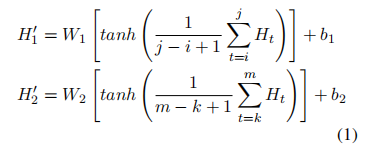
We make W1 and W2, b1 and b2 share the same parameters. In other words, we set W1 = W2, b1 = b2. For the final hidden state vector of the first token (i.e. ‘[CLS]’), we also add an activation operation and a fully connected layer, which is formally expressed as:
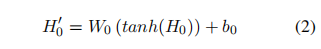
Matrices W0, W1, W2 have the same dimensions,i.e. W0 ∈ Rd×d, W1 ∈ Rd×d, W2 ∈ Rd×d, where d is the hidden state size from BERT.

We concatenate H00, H01, H02 and then add a fully connected layer and a softmax layer, which can be expressed as following:
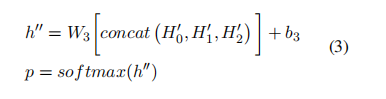

where W3 ∈ RL×3d (L is the number of relation types), and p is the probability output. In Equations (1),(2),(3), b0, b1, b2, b3 are bias vectors.

We use cross entropy as the loss function. We apply dropout before each fully connected layer during training. We call our approach as R-BERT.

## 3 方法
### 3.1 预训练模型BERT
预训练BERT模型(Devlin et al.， 2018)是一个多层双向Transformer编码器。

BERT的输入表示的设计是能够在一个标记序列中同时表示一个文本句和一对文本句。每个token的输入表示由相应的token、段和位置嵌入的和构成。

' [CLS] '附加到每个序列的开头，作为序列的第一个标记。与第一个token对应的Transformer输出的最终隐藏状态用作分类任务的句子表示。如果一个任务中有两个句子，用[SEP]将两个句子分开。

BERT通过使用一个预训练目标对模型参数进行预训练:掩码语言模型(MLM)，它从输入中随机屏蔽一些标记，并根据上下文设置优化目标来预测掩码单词的原始词汇id。与从左到右的语言模型预训练不同，MLM目标可以帮助状态输出同时利用左和右上下文，这允许预训练系统应用深层双向转换器。除了蒙面语言模型，BERT还训练了一个“下一句子预测”任务，它联合训练了文本对表示。

### 3.2 模型架构
图1显示了我们的方法的体系结构。

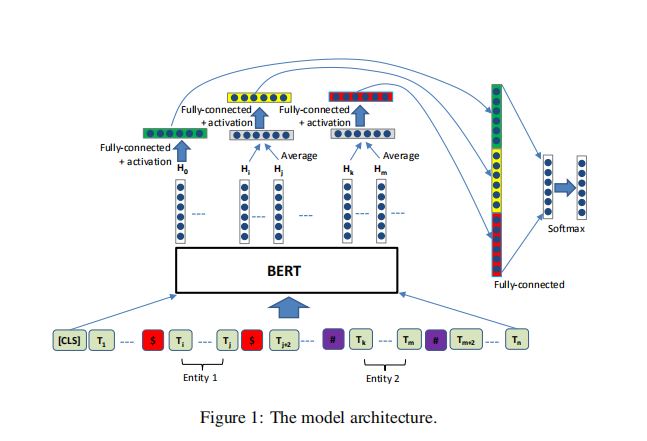

一个句子有两个目标实体的e1和e2,使BERT模块捕获两个实体的位置信息,在开始和结束的第一个实体,我们插入一个特殊令牌“$”,在开始和结束的第二个实体,我们插入一个特殊的符号“#”。我们还在每个句子的开头加上[CLS]。

例如，在插入特殊的单独标记后，对于带有目标实体“kitchen”和“house”的句子将变成:
“[CLS] The $ kitchen $ is the last renovated part of the # house # . ”

给定一个句子s 和实体e1和e2,假设其最终隐藏状态BERT模块的输出h .假设向量Hi到Hj最后隐藏状态向量从BERT实体e1和Hk到Hm最后隐藏状态向量e2伯特的实体。我们应用平均运算得到两个目标实体的向量表示。然后在激活操作(即tanh)之后，我们将一个全连通层添加到两个向量中，e1和e2的输出分别为H1和H2。这个过程可以用数学形式化为(1)式。
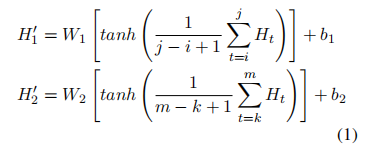
我们让W1和W2 b1和b2共享相同的参数。换句话说，我们令W1 = W2 b1 = b2。对于第一个token的最终隐藏状态向量(即‘[CLS]’)，我们还添加了一个激活操作和一个全连接层，其形式为:
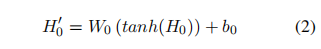
矩阵W0 W1 W2有相同的维数。∈Rd×d, W1∈Rd×d, W2∈Rd×d，其中d是BERT的隐藏状态大小。

我们将H00、H01、H02串联起来，然后添加一个全连通层和一个softmax层，可以表示为:
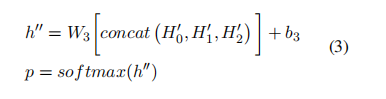

其中W3∈RL×3d (L为关系类型数)，p为概率输出。式(1)(2)(3)中，b0, b1, b2, b3为偏置向量。

我们用交叉熵作为损失函数。在训练中，我们在每一个全连接层之前应用dropout。我们称之为R-BERT。


## 5 Conclusions
In this paper, we develop an approach for relation classification by enriching the pre-trained BERT model with entity information. We add special separate tokens to each target entity pair and utilize the sentence vector as well as target entity representations for classification. We conduct experiments on the SemEval-2010 benchmark dataset and our results significantly outperform the stateof-the-art methods. One possible future work is to extend the model to apply to distant supervision.

## 结论
本文提出了一种基于实体信息的关系分类方法。我们为每个目标实体对添加特殊的独立标记，并利用句子向量和目标实体表示进行分类。我们在SemEval-2010基准数据集上进行了实验，我们的结果明显优于最先进的方法。一个可能的未来工作是将该模型扩展到远程监控。